In [5]:
# Importation du fichier de données
import pandas as pd
train = pd.read_csv("train_SentimentAnalysis.tsv", sep = '\t')
print(train.head())
test = pd.read_csv("test_SentimentAnalysis.tsv", sep = '\t')
print(test.head())

   PhraseId  ...  Sentiment
0         1  ...          1
1         2  ...          2
2         3  ...          2
3         4  ...          2
4         5  ...          2

[5 rows x 4 columns]
   PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine


In [6]:
# Description des sentiments
count_sentiment = train.Sentiment.value_counts()
print(count_sentiment)

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


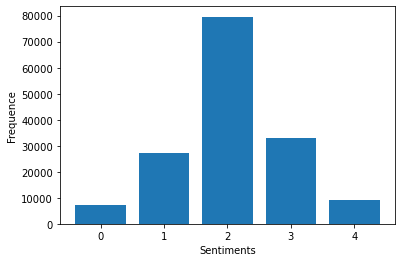

In [11]:
# PLotting of sentiments
import matplotlib.pyplot as plt
plt.bar(count_sentiment.index.values, count_sentiment)
plt.xlabel("Sentiments")
plt.ylabel("Frequence")
plt.show()

In [13]:
# Gébération de features : Bag of Words (représenter chaque sentiment
# sous forme de sac brute)
# en probleme de classification textuel, on a un ensemble de text avec leur
# label respectif. Cependant, on ne peut pas directement utiliser le texte
# pour la modélisation. Nous devons converir le texte en des vecteurs de 
# nombres. La méthode BoW est simple pour l'extraction des features 
# dans un texte : elle convertit le texte en une matrice d'occurence de mots
# et les mets sous forme de document.

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# suppression des éléments non désirés
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, 
                    stop_words='english',
                    ngram_range=(1,1),
                    tokenizer=token.tokenize)
text_count = cv.fit_transform(train['Phrase'])

In [14]:
# Training et testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(text_count,
                                               train['Sentiment'],
                                               test_size = 0.3)

In [15]:
# Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(xtrain, ytrain)
pred = clf.predict(xtest)

In [16]:
# Accuracy 
acc = metrics.accuracy_score(ytest,pred)
print(acc)

0.6085052757486437
